# Exploratory Data Analysis

# Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Create a sample DataFrame
data = {
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.randint(30000, 100000, size=100),
    'department': np.random.choice(['Sales', 'Engineering', 'HR', 'Marketing'], size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'years_of_experience': np.random.randint(1, 30, size=100)
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head(3))


   age  salary department  gender  years_of_experience
0   56   91228         HR  Female                   10
1   69   78984  Marketing    Male                    2
2   46   70774  Marketing  Female                   26


Important Considerations
    - The question (and how many variables that question involves)
    - The data (is it quantitative or categorical?)

Univariate Statistics
    - Summary statistics that focus on a single variable are called univariate statistics


Quantitative Variables
    - When summarizing quantitative variables, we often want to describe central location and spread.


Bivariate Statistics
    - In contrast to univariate statistics, bivariate statistics are used to summarize the relationship between two variables

Key objectives of EDA:
    • Detecting mistakes
    • Understanding patterns in the data
    • Identifying relationships between variables
    • Spotting anomalies or outliers

##### df.describe

df.describe gives the basic statistics of the dataframe (mean, median, mode, etc)


In [2]:
df.describe()

,age,salary,years_of_experience
count,100.000000,100.000000,100.000000
mean,43.350000,67758.110000,16.100000
std,14.904663,21128.310944,8.490637
min,19.000000,30206.000000,1.000000
25%,31.750000,51971.750000,9.000000
50%,42.000000,69428.500000,17.000000
75%,57.000000,85182.000000,23.000000
max,69.000000,99163.000000,29.000000


# Relationship Between Variables

### Correlation

Correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1:
- 1: Perfect positive correlation (as one variable increases, so does the other)
- -1: Perfect negative correlation (as one increases, the other decreases)
- 0: No correlation (no relationship between the variables)

##### Finding correlation with numpy `df.corr()`

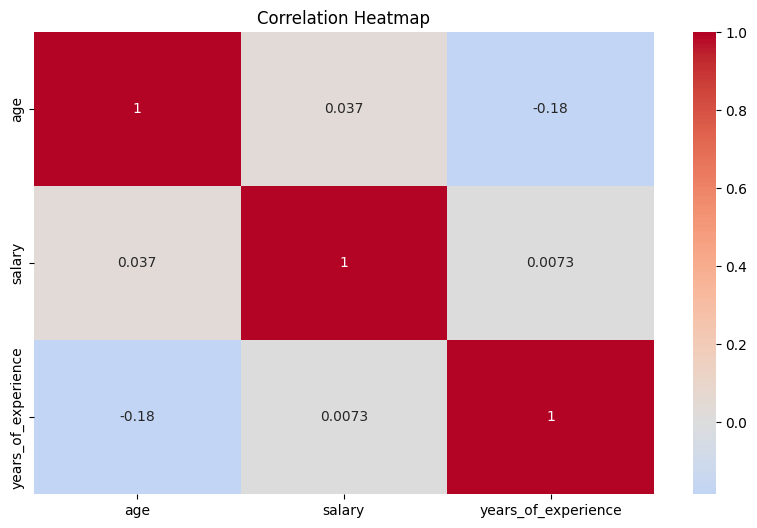

In [3]:
# Calculate the correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Explanation:
- Data Creation:

We generate random data for three numerical variables: age, salary, and years_of_experience.
We also generate a categorical variable: department.

- Filtering Numerical Data:

`df.select_dtypes(include=[np.number])` filters the DataFrame to include only numerical columns (since correlation only works with numerical data)

- Correlation Matrix Calculation:

`numerical_df.corr()` computes the pairwise correlation of numerical columns.

- Heatmap Visualization:

`sns.heatmap()` creates a heatmap of the correlation matrix.
annot=True displays the correlation coefficients in the heatmap cells.
cmap='coolwarm' uses a color palette where cool colors represent negative correlations and warm colors represent positive correlations.
center=0 centers the colormap at zero, so correlations close to zero will have a neutral color.
Running this code will generate a heatmap showing the correlation between age, salary, and years_of_experience, ignoring the categorical department column.

In [4]:
#without heat map, just printed
corr_matrix

,age,salary,years_of_experience
age,1.000000,0.037341,-0.184580
salary,0.037341,1.000000,0.007306
years_of_experience,-0.184580,0.007306,1.000000


##### Finding correlation with scipy `pearson()`

In [5]:
from scipy.stats import pearsonr

x = [1, 2, 3, 4]
y = [4, 3, 2, 1]

corr_coefficient, p_value = pearsonr(x, y)
print(f'Correlation Coeficcient:\n{corr_coefficient}\n')
print(f'p value:\n{p_value}')


ModuleNotFoundError: No module named 'scipy'

- Summary

    - Use `.corr()` for calculating correlations within pandas DataFrames or Series, especially when dealing with multiple variables.
    - Use `pearsonr()` when you need to calculate and assess the significance of the Pearson correlation coefficient between two specific data arrays.

##### Interpreting Correlation Results

When interpreting correlation results from .corr() and pearsonr(), here's what you typically look for:

`.corr()`
- corr() Method (Pandas DataFrame)
    - Range: The correlation coefficient ranges from -1 to 1.
    - 1: Perfect positive correlation (variables move in the same direction).
    - -1: Perfect negative correlation (variables move in opposite directions).
    - 0: No linear correlation.

- Typical Values:
    - Strong Correlation: |correlation coefficient| ≥ 0.7
    - Moderate Correlation: 0.3 ≤ |correlation coefficient| < 0.7
    - Weak Correlation: |correlation coefficient| < 0.3


`pearson()`
- Output
    -   Correlation Coefficient (r): Similar to the .corr() method, ranging from -1 to 1.
    -   P-value: Measures the significance of the correlation coefficient. A smaller p-value (typically < 0.05) indicates a statistically significant correlation.

- Typical Interpretation:

    - Strong Correlation: Correlation coefficient (r) ≥ 0.7 or ≤ -0.7
    - Moderate Correlation: 0.3 ≤ |r| < 0.7
    - Weak Correlation: |r| < 0.3

    - Significance: Check the p-value; if it is small (e.g., < 0.05), the correlation is considered statistically significant.